In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# change this to your own data directory
data_dir = "data/"

# read and preprocess data
text_file_name = "osdg-community-data-v2023-01-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
col_names = text_df.columns.values[0].split('\t')
text_df[col_names] = text_df[text_df.columns.values[0]].apply(lambda x: pd.Series(str(x).split("\t")))
text_df = text_df.astype({'sdg':int, 'labels_negative': int, 'labels_positive':int, 'agreement': float}, copy=True)
text_df.drop(text_df.columns.values[0], axis=1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2")
text_df.reset_index(inplace=True, drop=True)

In [3]:
docs = text_df.text
categories = text_df.sdg
X_train, X_test, y_train, y_test = \
    train_test_split(docs, categories, test_size=0.33, random_state=7)

# Solutions to Exercises: Sections 5 to 7

## Classification of Texts
For exercises 1 to 3, the below code will be used to establish the dataset used for all next classifications.

In [4]:
X_train_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words = "english", min_df=5)
X_train_tfidf_vectorizer.fit(X_train)
X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train)
X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test)

**Exercise 1**

In [5]:
tfidf_mlp_clf = MLPClassifier(random_state=1, max_iter=100).fit(X_train_tfidf_vector, y_train)
y_pred = tfidf_mlp_clf.predict(X_test_tfidf_vector)
tfidf_mlp_clf.score(X_test_tfidf_vector, y_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.81      0.80       481
           2       0.82      0.87      0.84       316
           3       0.94      0.93      0.94       674
           4       0.92      0.94      0.93       863
           5       0.92      0.92      0.92       920
           6       0.90      0.91      0.91       465
           7       0.88      0.88      0.88       730
           8       0.68      0.61      0.64       353
           9       0.79      0.80      0.79       328
          10       0.64      0.58      0.61       256
          11       0.85      0.88      0.86       462
          12       0.85      0.78      0.81       217
          13       0.85      0.87      0.86       443
          14       0.93      0.92      0.93       263
          15       0.89      0.85      0.87       313
          16       0.97      0.97      0.97      1057

    accuracy                           0.88      8141
   macro avg       0.85   

**Exercise 2**

In [6]:
tfidf_multinomialNB_clf = MultinomialNB().fit(X_train_tfidf_vector, y_train)
y_pred = tfidf_multinomialNB_clf.predict(X_test_tfidf_vector)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.70      0.73      0.71       481
           2       0.90      0.67      0.77       316
           3       0.92      0.90      0.91       674
           4       0.76      0.96      0.85       863
           5       0.62      0.94      0.75       920
           6       0.86      0.81      0.84       465
           7       0.60      0.97      0.74       730
           8       0.85      0.08      0.15       353
           9       0.91      0.32      0.48       328
          10       0.89      0.12      0.21       256
          11       0.86      0.75      0.80       462
          12       0.97      0.30      0.46       217
          13       0.84      0.80      0.82       443
          14       0.96      0.61      0.75       263
          15       0.96      0.64      0.77       313
          16       0.86      0.98      0.91      1057

    accuracy                           0.77      8141
   macro avg       0.84   

**Exercise 3**

In [7]:
from sklearn.linear_model import RidgeClassifier

tfidf_ridge_clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
tfidf_ridge_clf = tfidf_ridge_clf.fit(X_train_tfidf_vector, y_train)
y_pred = tfidf_ridge_clf.predict(X_test_tfidf_vector)
print(metrics.classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           1     0.8174    0.8004    0.8088       481
           2     0.8192    0.8892    0.8528       316
           3     0.9294    0.9377    0.9335       674
           4     0.9109    0.9594    0.9345       863
           5     0.9092    0.9467    0.9276       920
           6     0.9188    0.9247    0.9218       465
           7     0.8714    0.9096    0.8901       730
           8     0.7186    0.6006    0.6543       353
           9     0.8233    0.7957    0.8093       328
          10     0.6990    0.5625    0.6234       256
          11     0.8690    0.8615    0.8652       462
          12     0.8836    0.7696    0.8227       217
          13     0.8521    0.8713    0.8616       443
          14     0.9423    0.9316    0.9369       263
          15     0.9112    0.8850    0.8979       313
          16     0.9513    0.9612    0.9562      1057

    accuracy                         0.8840      8141
   macro avg     0.8642   

**Exercise 4**

Implementations may vary. One example is given below:

In [8]:
def ClassifyDocs(data, classifier_algorithm, params):
    docs = data.text
    categories = data.sdg
    X_train, X_test, y_train, y_test = train_test_split(docs, categories, test_size=0.33, random_state=7)

    X_train_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words = "english", min_df=5)
    X_train_tfidf_vectorizer.fit(X_train)
    X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train)
    X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test)
    
    if classifier_algorithm == "mlp":
        tfidf_mlp_clf = MLPClassifier(random_state=params[0], max_iter=params[1]).fit(X_train_tfidf_vector, y_train)
        y_pred = tfidf_mlp_clf.predict(X_test_tfidf_vector)
        tfidf_mlp_clf.score(X_test_tfidf_vector, y_test)
        print(metrics.classification_report(y_test,y_pred))

    elif classifier_algorithm == "multinomialNB":
        tfidf_multinomialNB_clf = MultinomialNB().fit(X_train_tfidf_vector, y_train)
        y_pred = tfidf_multinomialNB_clf.predict(X_test_tfidf_vector)
        print(metrics.classification_report(y_test,y_pred))

    elif classifier_algorithm == "ridge":
        tfidf_ridge_clf = RidgeClassifier(tol=params[0], solver=params[1])
        tfidf_ridge_clf = tfidf_ridge_clf.fit(X_train_tfidf_vector, y_train)
        y_pred = tfidf_ridge_clf.predict(X_test_tfidf_vector)
        print(metrics.classification_report(y_test,y_pred, digits = 4))

    else:
        print("Invalid classifier algorithm")

**Exercise 5**

In [9]:
print("MLP")
ClassifyDocs(text_df, "mlp", [1,100])
print("MultinomialNB")
ClassifyDocs(text_df, "multinomialNB", [])
print("Ridge")
class_params = [1e-2, "sparse_cg"]
ClassifyDocs(text_df, "ridge", class_params)

MLP
              precision    recall  f1-score   support

           1       0.79      0.81      0.80       481
           2       0.82      0.87      0.84       316
           3       0.94      0.93      0.94       674
           4       0.92      0.94      0.93       863
           5       0.92      0.92      0.92       920
           6       0.90      0.91      0.91       465
           7       0.88      0.88      0.88       730
           8       0.68      0.61      0.64       353
           9       0.79      0.80      0.79       328
          10       0.64      0.58      0.61       256
          11       0.85      0.88      0.86       462
          12       0.85      0.78      0.81       217
          13       0.85      0.87      0.86       443
          14       0.93      0.92      0.93       263
          15       0.89      0.85      0.87       313
          16       0.97      0.97      0.97      1057

    accuracy                           0.88      8141
   macro avg       0.8

## Evaluating Classification

**Exercise 1**

First, we do the prep needed before making the ROC curve:

In [12]:
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
import tensorflow_hub as hub

# change this to your own embedding directory
embedding_dir = ""

# load the embedding
embed = hub.load(embedding_dir + "universal-sentence-encoder_4")

text_df["embedding"] = list(embed(text_df.text))

file_name = "sdg_names_definitions.csv"
sdg_names = pd.read_csv(data_dir + file_name)

docs = text_df.embedding.tolist()
scaler = preprocessing.MinMaxScaler().fit(docs)
X = scaler.transform(docs)
y = text_df.sdg

label_binarizer = LabelBinarizer().fit(y)
y_onehot = label_binarizer.transform(y)
n_classes = len(label_binarizer.classes_)
class_names = [sdg_names[sdg_names["sdg"] == label_binarizer.classes_[i]].sdg_name.item() \
               for i in range(n_classes)]

2024-07-12 16:12:25.149972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


Then, we can make the curve itself. First for the Naive Bayes classification:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=.33, random_state=0)
ovr_nb_clf = OneVsRestClassifier(MultinomialNB()).fit(X_train,y_train)
y_score_nb = ovr_nb_clf.predict_proba(X_test)

/var/folders/px/b7vc3nh913zb_m0x36ncftj00000gn/T/ipykernel_86574/1881487763.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = list(cm.get_cmap('tab20').colors)


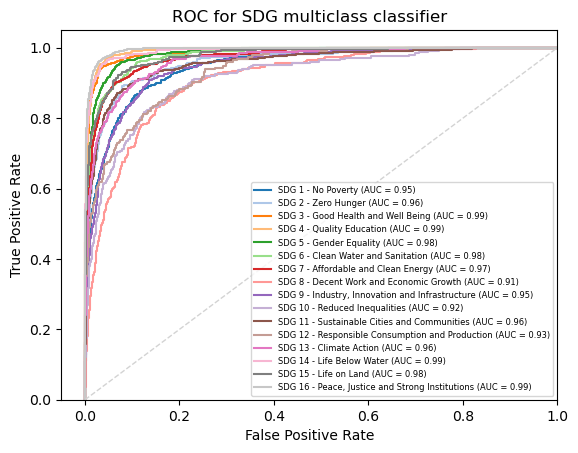

In [20]:
from matplotlib import cm
colors = list(cm.get_cmap('tab20').colors)

fpr = dict()
tpr = dict()
roc_auc = dict()
for class_id in range(n_classes):
    fpr[class_id], tpr[class_id], _ = metrics.roc_curve(y_test[:, class_id], y_score_nb[:, class_id]) # roc_curve works on binary
    roc_auc[class_id] = metrics.auc(fpr[class_id], tpr[class_id])

for class_id, color in zip(range(n_classes), colors):
    plt.plot(fpr[class_id], tpr[class_id], color=color, lw=1.5,alpha = 1, 
             label='SDG {0} - {1} (AUC = {2:0.2f})'
             ''.format(class_id+1, class_names[class_id], roc_auc[class_id]))
plt.plot([0, 1], [0, 1], '--', lw=1, color="lightgrey")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SDG multiclass classifier')
plt.legend(loc="lower right", fontsize=6)
plt.show()

And then for the Ridge classification:

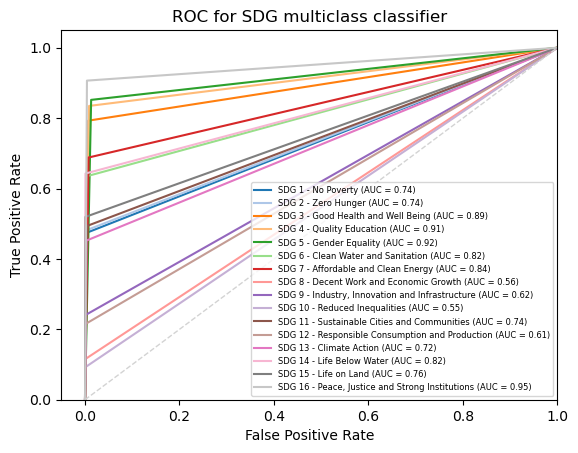

In [21]:
ovr_ridge_clf = OneVsRestClassifier(RidgeClassifier(tol=1e-2, solver="sparse_cg")).fit(X_train,y_train)
y_score_ridge = ovr_ridge_clf.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for class_id in range(n_classes):
    fpr[class_id], tpr[class_id], _ = metrics.roc_curve(y_test[:, class_id], y_score_ridge[:, class_id]) # roc_curve works on binary
    roc_auc[class_id] = metrics.auc(fpr[class_id], tpr[class_id])

for class_id, color in zip(range(n_classes), colors):
    plt.plot(fpr[class_id], tpr[class_id], color=color, lw=1.5,alpha = 1, 
             label='SDG {0} - {1} (AUC = {2:0.2f})'
             ''.format(class_id+1, class_names[class_id], roc_auc[class_id]))
plt.plot([0, 1], [0, 1], '--', lw=1, color="lightgrey")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SDG multiclass classifier')
plt.legend(loc="lower right", fontsize=6)
plt.show()

When students are making the plot for ridge regression, they will likely notice that ridge classifiers do not have a `predict_proba` method. Feel free to encourage students to look to other resources for overcoming this problem. Alternatively, ask them why they might think this is the case - the reason for this is because ridge regression does not calculate probabilities for its results in its basic form but must rather interpret the assigned values from the regression into some sort of probability, which it does not do by default.

**Exercise 2**

Answers may vary depending on the chosen goals but should follow the example given in the chapter.

**Exercise 3**

First, we perform the classification:

In [23]:
docs = text_df.embedding.tolist()
scaler = preprocessing.MinMaxScaler().fit(docs)
X = scaler.transform(docs)
y = text_df.sdg

label_binarizer = LabelBinarizer().fit(y)
y_onehot = label_binarizer.transform(y)
n_classes = len(label_binarizer.classes_)
class_names = [sdg_names[sdg_names["sdg"] == label_binarizer.classes_[i]].sdg_name.item() \
               for i in range(n_classes)]

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=.33, random_state=0)
ovr_nb_clf = OneVsRestClassifier(MultinomialNB()).fit(X_train,y_train)
y_score_nb = ovr_nb_clf.predict_proba(X_test)

Then we can make the plot, first for our Naive Bayes Classification. Note that we did SDG 15 for this plot as SDG yielded a plotting error for us; students can change goals as well.

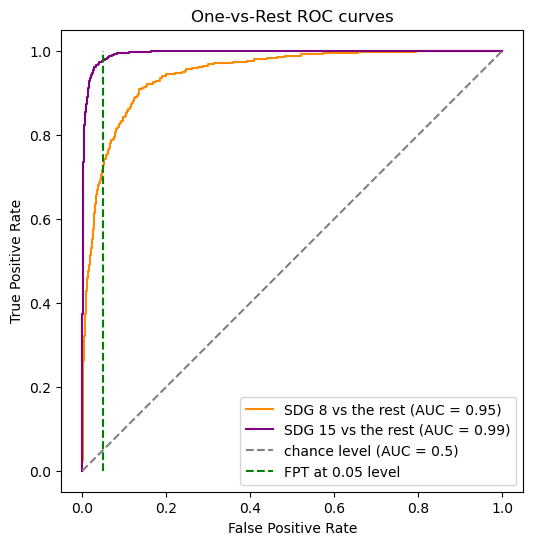

In [28]:
from sklearn.metrics import RocCurveDisplay

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

fig, ax = plt.subplots(figsize=(6,6))

class_of_interest = 8 # SDG 8
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_nb[:, class_id],
    name=f"SDG {class_of_interest} vs the rest",
    color="darkorange",
    ax = ax,
)

class_of_interest = 15
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_nb[:, class_id],
    name=f"SDG {class_of_interest} vs the rest",
    color="purple",
    ax = ax,
)

plt.plot([0, 1], [0, 1], "--", label="chance level (AUC = 0.5)", color = "grey")
plt.plot([0.05, 0.05], [0, 1], "--", label="FPT at 0.05 level", color = "green")

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

And then the Ridge classifier:

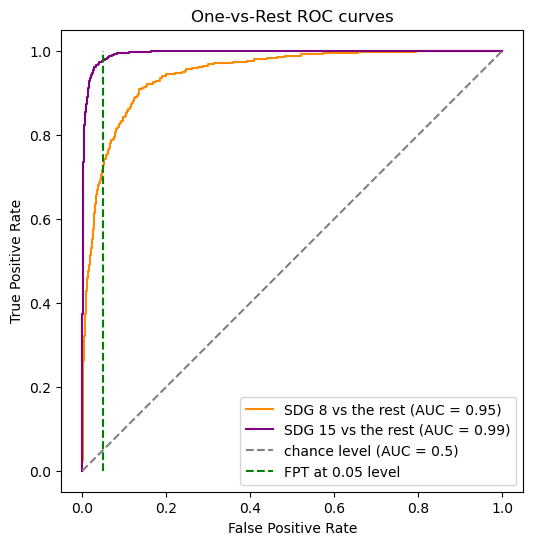

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=.33, random_state=0)
ovr_ridge_clf = OneVsRestClassifier(RidgeClassifier(tol=1e-2, solver="sparse_cg")).fit(X_train,y_train)
y_score_ridge = ovr_nb_clf.predict(X_test)

fig, ax = plt.subplots(figsize=(6,6))

class_of_interest = 8 # SDG 8
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_nb[:, class_id],
    name=f"SDG {class_of_interest} vs the rest",
    color="darkorange",
    ax = ax,
)

class_of_interest = 15
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_nb[:, class_id],
    name=f"SDG {class_of_interest} vs the rest",
    color="purple",
    ax = ax,
)

plt.plot([0, 1], [0, 1], "--", label="chance level (AUC = 0.5)", color = "grey")
plt.plot([0.05, 0.05], [0, 1], "--", label="FPT at 0.05 level", color = "green")

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

**Exercise 4**

Implementations may vary. One example is given below:


In [56]:
def ClassifyDocs_Advanced(data, classifier_algorithm, params, roc_plot = False, quick_metrics = False):
    docs = data.text
    categories = data.sdg
    X_train, X_test, y_train, y_test = train_test_split(docs, categories, test_size=0.33, random_state=7)

    X_train_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words = "english", min_df=5)
    X_train_tfidf_vectorizer.fit(X_train)
    X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train)
    X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test)

    metrics_report = ""
    
    if classifier_algorithm == "mlp":
        tfidf_mlp_clf = MLPClassifier(random_state=params[0], max_iter=params[1]).fit(X_train_tfidf_vector, y_train)
        y_pred = tfidf_mlp_clf.predict(X_test_tfidf_vector)
        tfidf_mlp_clf.score(X_test_tfidf_vector, y_test)
        metrics_report = metrics.classification_report(y_test,y_pred)

    elif classifier_algorithm == "multinomialNB":
        tfidf_multinomialNB_clf = MultinomialNB().fit(X_train_tfidf_vector, y_train)
        y_pred = tfidf_multinomialNB_clf.predict(X_test_tfidf_vector)
        metrics_report = metrics.classification_report(y_test,y_pred)

    elif classifier_algorithm == "ridge":
        tfidf_ridge_clf = RidgeClassifier(tol=params[0], solver=params[1])
        tfidf_ridge_clf = tfidf_ridge_clf.fit(X_train_tfidf_vector, y_train)
        y_pred = tfidf_ridge_clf.predict(X_test_tfidf_vector)
        metrics_report = metrics.classification_report(y_test,y_pred)

    else:
        print("Invalid classifier algorithm")
        return 0

    if quick_metrics:
        #print only accuracy, precision, recall, f1-score from metrics_report
        print(metrics_report.split("\n")[0])
    else:
        print(metrics_report)

    if roc_plot:
        #plot ROC curve
        label_binarizer = LabelBinarizer().fit(y_test)
        y_onehot_test = label_binarizer.transform(y_test)
        y_score = None
        if classifier_algorithm == "mlp":
            y_score = tfidf_mlp_clf.predict_proba(X_test_tfidf_vector)
        elif classifier_algorithm == "multinomialNB":
            y_score = tfidf_multinomialNB_clf.predict_proba(X_test_tfidf_vector)
        elif classifier_algorithm == "ridge":
            y_score = tfidf_ridge_clf.decision_function(X_test_tfidf_vector)
        else:
            print("Invalid classifier algorithm")
            return 0

        fig, ax = plt.subplots(figsize=(6,6))

        from matplotlib import cm
        colors = list(cm.get_cmap('tab20').colors)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for class_id in range(n_classes):
            fpr[class_id], tpr[class_id], _ = metrics.roc_curve(y_test[:, class_id], y_score_nb[:, class_id]) # roc_curve works on binary
            roc_auc[class_id] = metrics.auc(fpr[class_id], tpr[class_id])

        for class_id, color in zip(range(n_classes), colors):
            plt.plot(fpr[class_id], tpr[class_id], color=color, lw=1.5,alpha = 1, 
             label='SDG {0} - {1} (AUC = {2:0.2f})'
             ''.format(class_id+1, class_names[class_id], roc_auc[class_id]))
        plt.plot([0, 1], [0, 1], '--', lw=1, color="lightgrey")
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC for SDG multiclass classifier')
        plt.legend(loc="lower right", fontsize=6)
        plt.show()

**Exercise 5**

A point at (1,1) corresponds to a model that predicts everything as a positive, leading to all data points being labeled as positive (so a 100% true and false positive rate). A point at (0,0) corresponds to a model that predicts everything as a negative (so a 0% true and false positive rate). While students do not have to elaborate on this, this hopefully demonstrates that a model with 100% true positive rate or a model with 0% false positive rate is not necessarily a good thing.

## Applications

**Exercise 1**

Since we are classifying new text data, we do not need to use as many data points for testing purposes. In previous chapters, more testing points are better for model evaluation, while more training data is better to make a more accurate model. In this case, having more training data can make for a more classification of the new texts.

**Exercise 2**

For these exercises, the training process can take a while, but it is interruptable, as in the solutions given below. The results for the MLP classifier are given as follows:

/opt/anaconda3/envs/nlp2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           1     0.7833    0.8191    0.8008       481
           2     0.8672    0.7025    0.7762       316
           3     0.9139    0.9139    0.9139       674
           4     0.9034    0.9316    0.9173       863
           5     0.8196    0.9380    0.8748       920
           6     0.8554    0.9290    0.8907       465
           7     0.6689    0.9384    0.7811       730
           8     0.7807    0.4136    0.5407       353
           9     0.7925    0.5823    0.6714       328
          10     0.7616    0.4492    0.5651       256
          11     0.8546    0.7381    0.7921       462
          12     0.9007    0.5853    0.7095       217
          13     0.7106    0.8646    0.7800       443
          14     0.8125    0.8403    0.8262       263
          15     0.9174    0.6741    0.7772       313
          16     0.9545    0.9716    0.9630      1057

    accuracy                         0.8326      8141
   macro avg     0.8311   

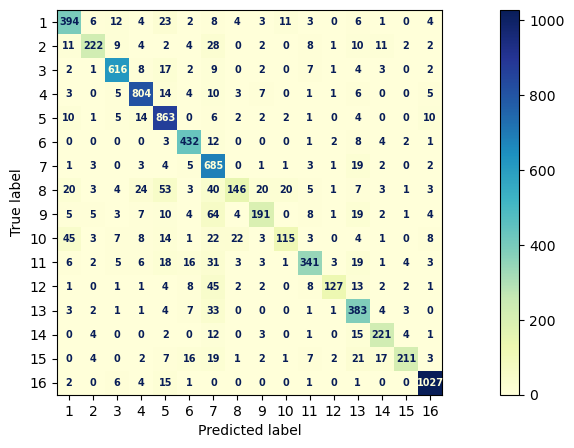

In [33]:
import requests
from bs4 import BeautifulSoup
url = "https://news.un.org/en/story/2023/07/1138767"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

from nltk import sent_tokenize
page_sentences = []
for tag in soup.find_all('p'):
        if (len(tag.text)>=30):
            sentences = sent_tokenize(tag.text)
            page_sentences = page_sentences + sentences
page_sentence_df = pd.DataFrame({"text": page_sentences})

# change this to your own data directory
data_dir = "data/"

# read and preprocess data
text_file_name = "osdg-community-data-v2023-01-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
col_names = text_df.columns.values[0].split('\t')
text_df[col_names] = text_df[text_df.columns.values[0]].apply(lambda x: pd.Series(str(x).split("\t")))
text_df = text_df.astype({'sdg':int, 'labels_negative': int, 'labels_positive':int, 'agreement': float}, copy=True)
text_df.drop(text_df.columns.values[0], axis=1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2")
text_df.reset_index(inplace=True, drop=True)

docs = text_df.text
categories = text_df.sdg
X_train, X_test, y_train, y_test = \
    train_test_split(docs, categories, test_size=0.33, random_state=7)

X_train_count_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words = "english" )
X_train_count_vectorizer.fit(X_train)  
X_train_count_vector = X_train_count_vectorizer.transform(X_train) 
X_test_count_vector = X_train_count_vectorizer.transform(X_test) 

count_MLP_clf = MLPClassifier(random_state=1, max_iter=100).fit(X_train_count_vector, y_train)
y_pred = count_MLP_clf.predict(X_test_count_vector)

fig, ax = plt.subplots(figsize=(15, 5))
font = {'family': 'sans-serif', 'weight': 'heavy','size': 7,} # set font for displaying confusion matrix
cm = mpl.colormaps["YlGnBu"] # set the color map for displaying confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, text_kw=font, ax=ax, cmap=cm)
print(metrics.classification_report(y_test,y_pred, digits = 4))

Similarly, the solutions for Ridge Regression work as follows:

              precision    recall  f1-score   support

           1     0.7700    0.8004    0.7849       481
           2     0.7697    0.7405    0.7548       316
           3     0.8640    0.9139    0.8882       674
           4     0.7321    0.9502    0.8270       863
           5     0.8081    0.9109    0.8564       920
           6     0.8803    0.8538    0.8668       465
           7     0.8033    0.8616    0.8315       730
           8     0.6944    0.4249    0.5272       353
           9     0.7094    0.5732    0.6341       328
          10     0.7093    0.4766    0.5701       256
          11     0.7642    0.7294    0.7464       462
          12     0.7925    0.5806    0.6702       217
          13     0.8049    0.8104    0.8076       443
          14     0.8773    0.7338    0.7992       263
          15     0.9057    0.7061    0.7935       313
          16     0.9439    0.9555    0.9497      1057

    accuracy                         0.8138      8141
   macro avg     0.8018   

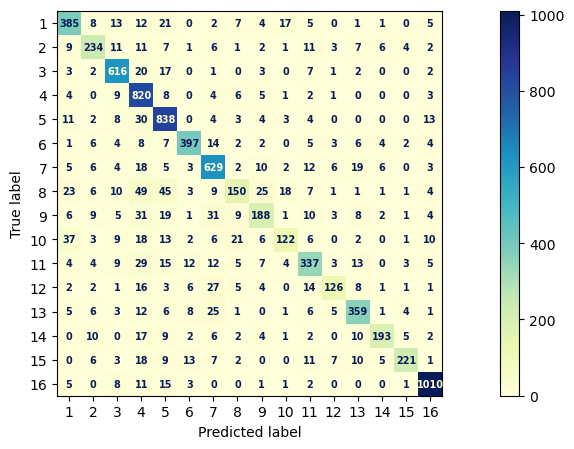

In [34]:
count_ridge_clf = RidgeClassifier(tol=1e-2, solver="sparse_cg").fit(X_train_count_vector, y_train)
y_pred = count_ridge_clf.predict(X_test_count_vector)

fig, ax = plt.subplots(figsize=(15, 5))
font = {'family': 'sans-serif', 'weight': 'heavy','size': 7,} # set font for displaying confusion matrix
cm = mpl.colormaps["YlGnBu"] # set the color map for displaying confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, text_kw=font, ax=ax, cmap=cm)
print(metrics.classification_report(y_test,y_pred, digits = 4))

Answers comparing these models may vary, but they are largely similar in their results.

**Exercise 3**

Answers may vary as to how the students classify the website by reading it; however, goal 8 (Decent work and economic growth) or goal 1 (No poverty) should make the most sense.

To classify this document with Naive Bayes, we do the following:

In [35]:
url = "https://www.rockefellerfoundation.org/our-work/economic-equity/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

page_sentences = []
for tag in soup.find_all('p'):
        if (len(tag.text)>=30):
            sentences = sent_tokenize(tag.text)
            page_sentences = page_sentences + sentences
page_sentence_df = pd.DataFrame({"text": page_sentences})

count_NB_clf = MultinomialNB().fit(X_train_count_vector, y_train)
y_pred = count_NB_clf.predict(X_test_count_vector)

page_count_vector = X_train_count_vectorizer.transform(pd.Series(page_sentence_df.text.str.cat()))
page_pred = count_NB_clf.predict(page_count_vector)
page_pred

array([1])

**Exercise 4**

High similarity would indicate that more components of the vectors are similar to each other and therefore the vectors have a smaller angle between them. For cosines, we know that smaller angles lead to a higher cosine value, leading to a higher score. So a high score indicates high similarity. Students can also be asked to demonstrate this on a mathematical level, but this is optional.

**Exercise 5**

The process for generating the similarity matrix uses the same code given in the textbook examples, at least for dataframe generation.

In [40]:
import tensorflow as tf
import tensorflow_hub as hub

# change this to your own embedding directory
embedding_dir = ""

# load the embedding
embed = hub.load(embedding_dir + "universal-sentence-encoder_4")

text_df["embedding"] = list(embed(text_df.text))

def get_sentence_df(text_df):
    text_df_sentence = []
    text_df_sdg = []
    text_df_text_id = []
    embedding = []
    for (text, sdg, text_id) in iter(zip(text_df.text, text_df.sdg, text_df.text_id)):
        temp_sentence = sent_tokenize(text)
        text_df_sentence = text_df_sentence + temp_sentence
        text_df_sdg = text_df_sdg + [sdg]*len(temp_sentence)
        text_df_text_id = text_df_text_id + [text_id]*len(temp_sentence)
        embedding = embedding + list(embed(temp_sentence))
    sentence_df = pd.DataFrame({"text": text_df_sentence, 
                                "sdg": text_df_sdg, 
                                "text_id": text_df_text_id,
                                "embedding": embedding})
    return sentence_df

sentence_df = get_sentence_df(text_df)

2024-07-15 19:47:39.705699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


To get the first 40 documents, we'll use similar code but calling a different dataframe:

<Axes: >

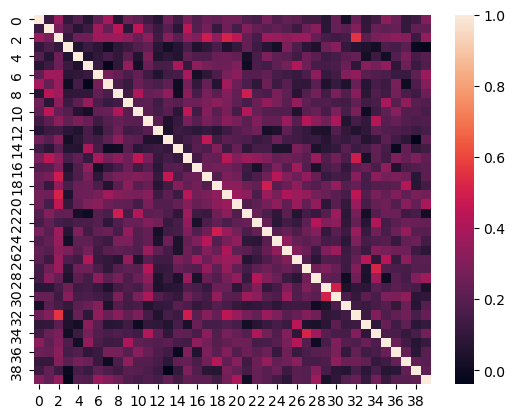

In [41]:
sns.heatmap(np.array(np.inner(text_df.embedding[:40].tolist(), 
                              text_df.embedding[:40].tolist())))

**Exercise 6**

The code for this is given below. Students may have trouble with runtimes for this due to the number of sentences, in which case you can subset by SDG or position.

In [ ]:
sns.heatmap(np.array(np.inner(sentence_df.embedding.tolist(), \
                              sentence_df.embedding.tolist())))

**Exercise 7**

In [43]:
def get_most_similar(text_df, sentence, n = 5):
    sentence_sim = np.inner(list(text_df.embedding), embed([sentence]))
    val = sorted(sentence_sim, reverse=True)[n]
    return text_df[sentence_sim > val].text

s = "countries are working hard to save the ocean aminals."
get_most_similar(text_df, sentence = s, n=5)

5780     Oceans cover approximately 71% of the Earth's ...
8186     It puts forward a working definition of the oc...
12106    However, many commercial fish stocks are overf...
15024    Ninety-eight per cent of the area occupied by ...
18113    The top three African countries that have the ...
Name: text, dtype: object

**Exercise 8**

Students can also take subsets of the sentences, due to the sheer number of sentences present.

<Axes: >

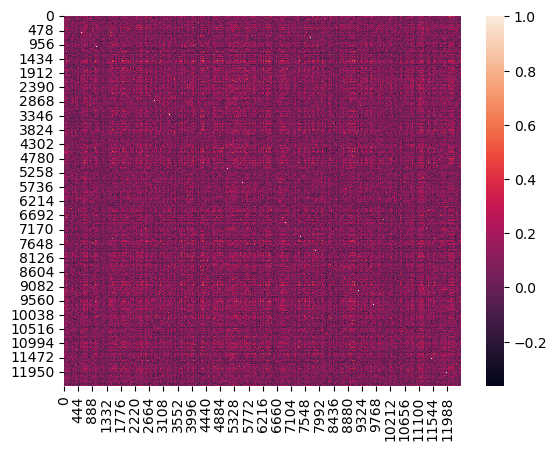

In [55]:
#get subset of sentence_df with sdg as 1 or 3
sentence_df_subset = sentence_df[sentence_df.sdg.isin([1,3])]

#make a heatmap
sns.heatmap(np.array(np.inner(sentence_df_subset.embedding.tolist(), \
                              sentence_df_subset.embedding.tolist())))

**Exercise 9**

In [48]:
"""GetMostSimilarToURL(url, text_df, n = 5) takes in a url as a string, parses
it into a single string, and then calls get_most_similar to get the most similar documents."""
def GetMostSimilarToURL(url, text_df, n = 5):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    page_sentences = []
    for tag in soup.find_all('p'):
        if (len(tag.text)>=30):
            sentences = sent_tokenize(tag.text)
            page_sentences = page_sentences + sentences
    
    #make all the strings in page_sentences into one string
    page_string = ' '.join(page_sentences)

    #use this to call get_most_similar
    return get_most_similar(text_df, page_string, n)


**Exercise 10**

In [49]:
GetMostSimilarToURL("http://gianttortoise.org/en/beyond-tracking", text_df, n = 5)

4329     A rather large number of species of birds, inv...
4981     In general, neither mechanical nor chemical re...
5758     Assessments now typically involve an “intense ...
10274    The Conservation Banking scheme in the United ...
14146    Local communities and individual farmers prefe...
Name: text, dtype: object

In [50]:
GetMostSimilarToURL("https://www.dhs.gov/blue-campaign/what-human-trafficking", text_df, n = 5)

6677     ABSTRACTThis interpretive policy analysis of A...
10997    The trafficking of persons around the world is...
11409    Human trafficking is a serious global problem ...
22162    Sex trafficking is recognized as a national pr...
24426    International human rights law protects agains...
Name: text, dtype: object

In [51]:
GetMostSimilarToURL("https://www.dol.gov/agencies/odep/program-areas/individuals/older-workers", text_df, n = 5)

1868     In addition, the government has taken some mea...
2098     Although educational attainment has increased ...
18319    More than 280,000 disabled South Africans aged...
20533    Those who have been brought up in poor homes, ...
24499    Such a shift in viewpoint may account for a la...
Name: text, dtype: object

In [52]:
GetMostSimilarToURL("https://michigantoday.umich.edu/2022/08/26/positively-breaking-the-age-code/", text_df, n = 5)

6072     Purpose – The purpose of this paper is to prov...
9517     Eggleston and Fuchs (2012) show that at the be...
13177    The per-capita expenditure is projected accord...
15112    On the other hand, heavy drinking was shown to...
21460    The RAND Future Elderly Model [9] came the clo...
Name: text, dtype: object

Answers may vary as to whether or not the returned documents are most similar. However, students should try and call code such as `text_df[6072]` so as to read the texts as much as possible before coming to a conclusion.